In [3]:
import os
import pandas as pd

filepaths = []

for file in os.listdir("ml-25m"):
    filepath = "./ml-25m/" + f"{file}"
    filepaths.append(filepath)


filepaths
    

['./ml-25m/links.csv',
 './ml-25m/tags.csv',
 './ml-25m/genome-tags.csv',
 './ml-25m/ratings.csv',
 './ml-25m/README.txt',
 './ml-25m/genome-scores.csv',
 './ml-25m/movies.csv']

In [9]:
with open(filepaths[2]) as gentags, open(filepaths[-2]) as genscores:
    df_gentags = pd.read_csv(gentags)
    df_genscores = pd.read_csv(genscores)




(   movieId  tagId  relevance
 0        1      1    0.02875
 1        1      2    0.02375
 2        1      3    0.06250
 3        1      4    0.07575
 4        1      5    0.14075,
    tagId           tag
 0      1           007
 1      2  007 (series)
 2      3  18th century
 3      4         1920s
 4      5         1930s)

In [10]:
df_genscores.describe()

,movieId,tagId,relevance
count,1.558445e+07,1.558445e+07,1.558445e+07
mean,4.602249e+04,5.645000e+02,1.163679e-01
std,5.535221e+04,3.256254e+02,1.544722e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.853750e+03,2.827500e+02,2.400000e-02
50%,8.575500e+03,5.645000e+02,5.650000e-02
75%,8.018650e+04,8.462500e+02,1.407500e-01
max,2.064990e+05,1.128000e+03,1.000000e+00


In [12]:
df_genscores['relevance'].max(), df_genscores['relevance'].min()

(1.0, 0.0002499999999999)

relevance has a scale from 0 to 1, maybe discard regarding to relevance at some point ? (too low relevance)

In [16]:
with open(filepaths[3]) as scores:
    df_scores = pd.read_csv(scores)


len(df_scores.query("userId == 1"))

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
65,1,27193,3.0,1147879774
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115
68,1,31956,3.5,1147877610


Maybe toss users with too few reviews ?

In [64]:
v = df_scores.userId.value_counts()
df = pd.DataFrame(v)
df.describe()

,userId
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


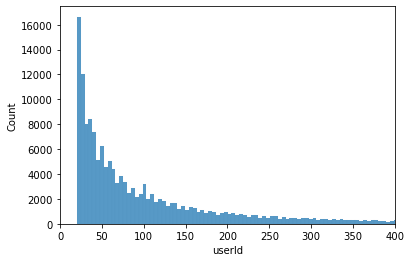

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df, x = df['userId'])
plt.xlim(0,400)
plt.show()

In [36]:
df_scores.query("userId == 80974")

,userId,movieId,rating,timestamp
12513537,80974,1,4.0,997044423
12513538,80974,2,4.0,997144402
12513539,80974,3,3.0,997144734
12513540,80974,4,3.0,997146175
12513541,80974,5,3.0,997145617
...,...,...,...,...
12522710,80974,129514,2.5,1432073042
12522711,80974,135224,0.5,1450989889
12522712,80974,135955,3.0,1439058843
12522713,80974,136542,4.0,1439060065


is it realistic that an user has seen more than 2000 movies ?

# B)

In [90]:
reviews_per_movie = df_scores.movieId.value_counts()
top_10_movies = reviews_per_movie[:10]
top_10_movies_ids = top_10_movies.index.to_list()


In [91]:
with open(filepaths[-1]) as movies:
    df_movies = pd.read_csv(movies)


df_movies_top_10 = df_movies[df_movies['movieId'].isin(top_10_movies_ids)]
df_movies_top_10

,movieId,title,genres
108,110,Braveheart (1995),Action|Drama|War
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
314,318,"Shawshank Redemption, The (1994)",Crime|Drama
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War
475,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
522,527,Schindler's List (1993),Drama|War
585,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2480,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2867,2959,Fight Club (1999),Action|Crime|Drama|Thriller


# C)

In [102]:
df_scores_top_10 = df_scores[df_scores['movieId'].isin(top_10_movies_ids)]
print(df_scores_top_10.query("movieId == 110")['rating'].mean())

means = []

for id in top_10_movies_ids:
    means.append(df_scores_top_10.query(f"movieId == {id}")['rating'].mean())




4.002272573668559


In [103]:
top_10_movies_mean_ratings = pd.DataFrame({'movieId' : top_10_movies_ids, 'mean rating': means})
top_10_movies_mean_ratings

,movieId,mean rating
0,356,4.048011
1,318,4.413576
2,296,4.188912
3,593,4.151342
4,2571,4.154099
5,260,4.120189
6,480,3.679175
7,527,4.247579
8,110,4.002273
9,2959,4.228311


In [104]:
merged_inner = pd.merge(left=df_movies_top_10, right=top_10_movies_mean_ratings, left_on='movieId', right_on='movieId')
merged_inner

,movieId,title,genres,mean rating
0,110,Braveheart (1995),Action|Drama|War,4.002273
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912
3,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576
4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011
5,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.679175
6,527,Schindler's List (1993),Drama|War,4.247579
7,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342
8,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099
9,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311


In [105]:
df_movies_to_plot = df_movies.drop('genres', axis = 1)
df_movies_to_plot.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [122]:
df_movies_to_plot['titles'] = df_movies_to_plot['title'].str.split( "(", expand=False)
df_movies_to_plot['year'] = df_movies_to_plot['titles'][1][1][:-1]



#df_movies_to_plot['titles'][1][1]

df_movies_to_plot



,movieId,title,titles,year
0,1,Toy Story (1995),"[Toy Story , 1995)]",1995
1,2,Jumanji (1995),"[Jumanji , 1995)]",1995
2,3,Grumpier Old Men (1995),"[Grumpier Old Men , 1995)]",1995
3,4,Waiting to Exhale (1995),"[Waiting to Exhale , 1995)]",1995
4,5,Father of the Bride Part II (1995),"[Father of the Bride Part II , 1995)]",1995
...,...,...,...,...
62418,209157,We (2018),"[We , 2018)]",1995
62419,209159,Window of the Soul (2001),"[Window of the Soul , 2001)]",1995
62420,209163,Bad Poems (2018),"[Bad Poems , 2018)]",1995
62421,209169,A Girl Thing (2001),"[A Girl Thing , 2001)]",1995
